In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download the file

!wget 'https://maven-datasets.s3.amazonaws.com/Airbnb/Airbnb+Data.zip'

--2023-11-18 05:24:06--  https://maven-datasets.s3.amazonaws.com/Airbnb/Airbnb+Data.zip
Resolving maven-datasets.s3.amazonaws.com (maven-datasets.s3.amazonaws.com)... 3.5.17.230, 52.217.133.241, 3.5.20.157, ...
Connecting to maven-datasets.s3.amazonaws.com (maven-datasets.s3.amazonaws.com)|3.5.17.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91005234 (87M) [application/zip]
Saving to: ‘Airbnb+Data.zip’

Airbnb+Data.zip     100%[===================>]  86.79M  25.3MB/s    in 5.5s    

2023-11-18 05:24:12 (15.9 MB/s) - ‘Airbnb+Data.zip’ saved [91005234/91005234]



In [3]:
# Unzip the file

!unzip Airbnb+Data.zip

Archive:  Airbnb+Data.zip
   creating: Airbnb Data/
  inflating: Airbnb Data/Listings.csv  
  inflating: Airbnb Data/Listings_data_dictionary.csv  
  inflating: Airbnb Data/Reviews.csv  
  inflating: Airbnb Data/Reviews_data_dictionary.csv  


In [27]:
# Load the data frames

listings =  pd.read_csv('/content/Airbnb Data/Listings.csv', encoding = 'latin1', low_memory = False)

reviews = pd.read_csv('/content/Airbnb Data/Reviews.csv', encoding = 'latin1', low_memory = False)

In [28]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [6]:
listings.isna().sum() / len(listings) * 100

listing_id                      0.000000
name                            0.061849
host_id                         0.000000
host_since                      0.058989
host_location                   0.300309
host_response_time             46.040928
host_response_rate             46.040928
host_acceptance_rate           40.429799
host_is_superhost               0.058989
host_total_listings_count       0.058989
host_has_profile_pic            0.058989
host_identity_verified          0.058989
neighbourhood                   0.000000
district                       86.767818
city                            0.000000
latitude                        0.000000
longitude                       0.000000
property_type                   0.000000
room_type                       0.000000
accommodates                    0.000000
bedrooms                       10.523324
amenities                       0.000000
price                           0.000000
minimum_nights                  0.000000
maximum_nights  

In [29]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   listing_id   int64 
 1   review_id    int64 
 2   date         object
 3   reviewer_id  int64 
dtypes: int64(3), object(1)
memory usage: 164.0+ MB


In [8]:
reviews.isna().sum() / len(reviews) * 100

listing_id     0.0
review_id      0.0
date           0.0
reviewer_id    0.0
dtype: float64

In [9]:
temp = listings.copy()

temp.dropna(inplace = True)

In [10]:
num_cols = ['host_id', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bedrooms', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']

In [11]:
temp[num_cols].corr()

,host_id,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
host_id,1.000000,-0.012776,0.015614,0.101023,-0.001192,-0.004971,-0.045449,-0.123576,0.038116,-0.155493,-0.175050,-0.084466,-0.168425,-0.181652,-0.091749,-0.134895
host_total_listings_count,-0.012776,1.000000,0.045491,-0.058425,-0.036200,-0.035359,0.054768,0.085866,0.075998,-0.047241,-0.041201,-0.028289,-0.032698,-0.082682,0.012712,-0.075884
latitude,0.015614,0.045491,1.000000,0.109150,-0.048522,-0.066006,0.021168,0.049920,0.059732,-0.043178,-0.056398,-0.039143,-0.053356,-0.041061,0.022254,-0.053181
longitude,0.101023,-0.058425,0.109150,1.000000,-0.013481,-0.009625,-0.138952,-0.088616,-0.060979,0.003033,0.014544,0.027406,0.016303,0.012057,-0.112259,0.026470
accommodates,-0.001192,-0.036200,-0.048522,-0.013481,1.000000,0.739529,0.489872,-0.034406,0.015994,-0.002106,-0.006659,0.031196,0.002047,0.010440,-0.020398,-0.027289
bedrooms,-0.004971,-0.035359,-0.066006,-0.009625,0.739529,1.000000,0.466877,0.002825,0.005387,0.017612,0.006306,0.029069,0.016022,0.016598,-0.004808,-0.000316
price,-0.045449,0.054768,0.021168,-0.138952,0.489872,0.466877,1.000000,0.003234,0.036969,0.044269,0.014197,0.067798,0.005636,0.007362,0.065931,-0.009735
minimum_nights,-0.123576,0.085866,0.049920,-0.088616,-0.034406,0.002825,0.003234,1.000000,0.114562,-0.027850,-0.029010,-0.076200,-0.014616,-0.035008,-0.015185,-0.064064
maximum_nights,0.038116,0.075998,0.059732,-0.060979,0.015994,0.005387,0.036969,0.114562,1.000000,-0.065232,-0.061683,-0.076808,-0.058508,-0.064190,-0.012765,-0.074553
review_scores_rating,-0.155493,-0.047241,-0.043178,0.003033,-0.002106,0.017612,0.044269,-0.027850,-0.065232,1.000000,0.816037,0.750319,0.683762,0.751203,0.552686,0.815908


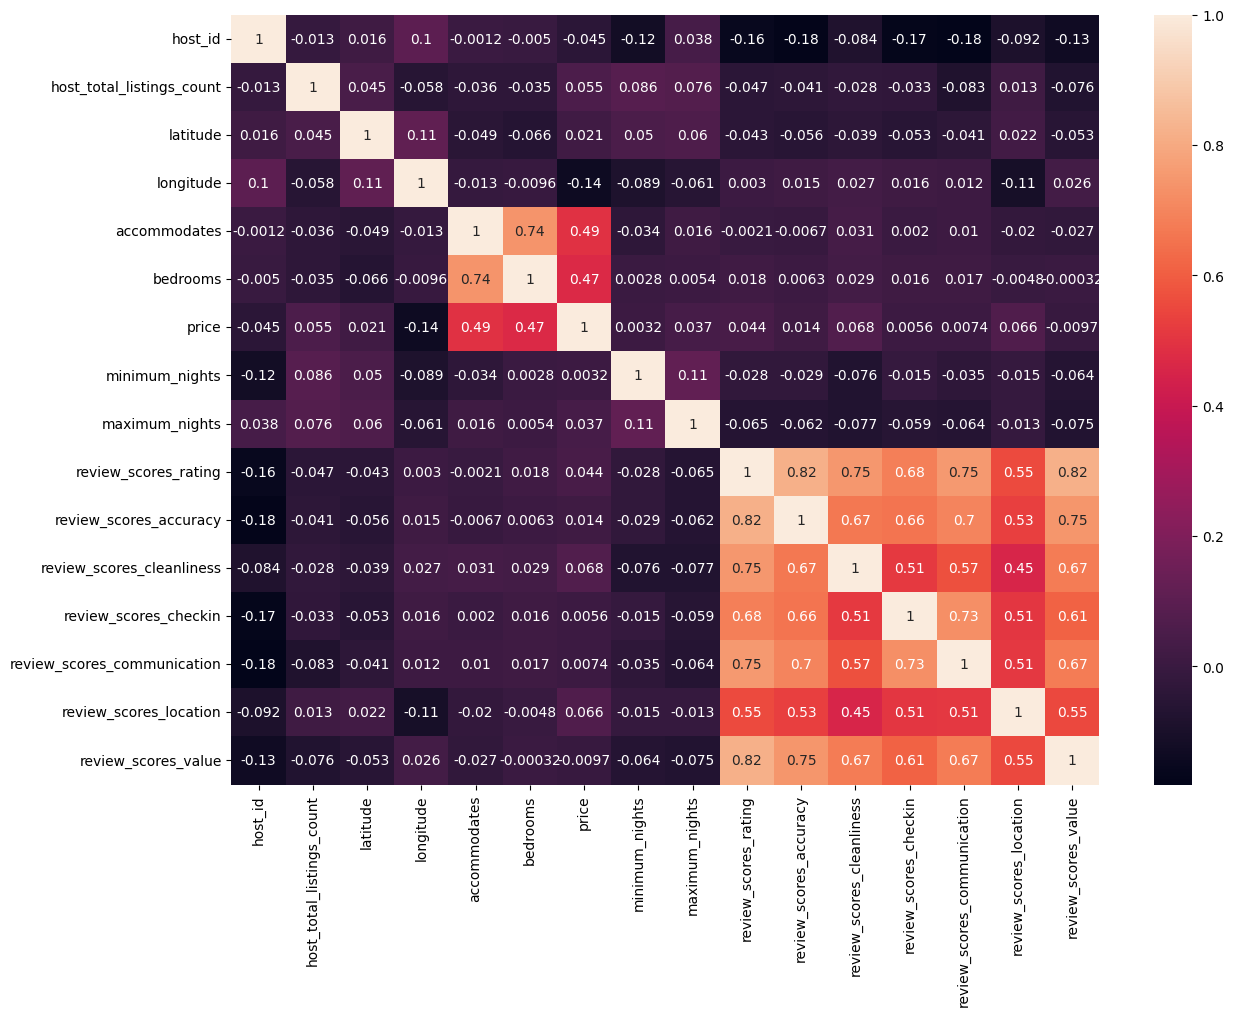

In [12]:
plt.figure(figsize = (14, 10))

sns.heatmap(temp[num_cols].corr(), annot = True)

plt.show();

In [13]:
temp.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1.184900e+04,1.184900e+04,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000
mean,2.603917e+07,1.060450e+08,0.905780,0.829629,16.125158,40.726072,-73.943696,3.204659,1.393789,133.006414,14.540046,606.642248,93.600557,9.557262,9.328635,9.719892,9.679045,9.603004,9.335218
std,1.509014e+07,1.145032e+08,0.221329,0.239296,108.069067,0.058832,0.057525,2.165789,0.799571,175.579772,17.789273,508.393701,9.684552,0.967718,1.080656,0.823427,0.919461,0.781957,1.043796
min,3.831000e+03,2.571000e+03,0.000000,0.000000,0.000000,40.508680,-74.239860,1.000000,1.000000,10.000000,1.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.313946e+07,9.443343e+06,0.930000,0.770000,1.000000,40.684930,-73.982570,2.000000,1.000000,55.000000,2.000000,60.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.820614e+07,5.141459e+07,1.000000,0.930000,2.000000,40.721450,-73.951750,2.000000,1.000000,95.000000,5.000000,365.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.992171e+07,1.909218e+08,1.000000,1.000000,4.000000,40.761860,-73.923270,4.000000,2.000000,150.000000,30.000000,1125.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.797869e+07,3.845726e+08,1.000000,1.000000,2739.000000,40.910780,-73.710870,16.000000,21.000000,4500.000000,365.000000,2100.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


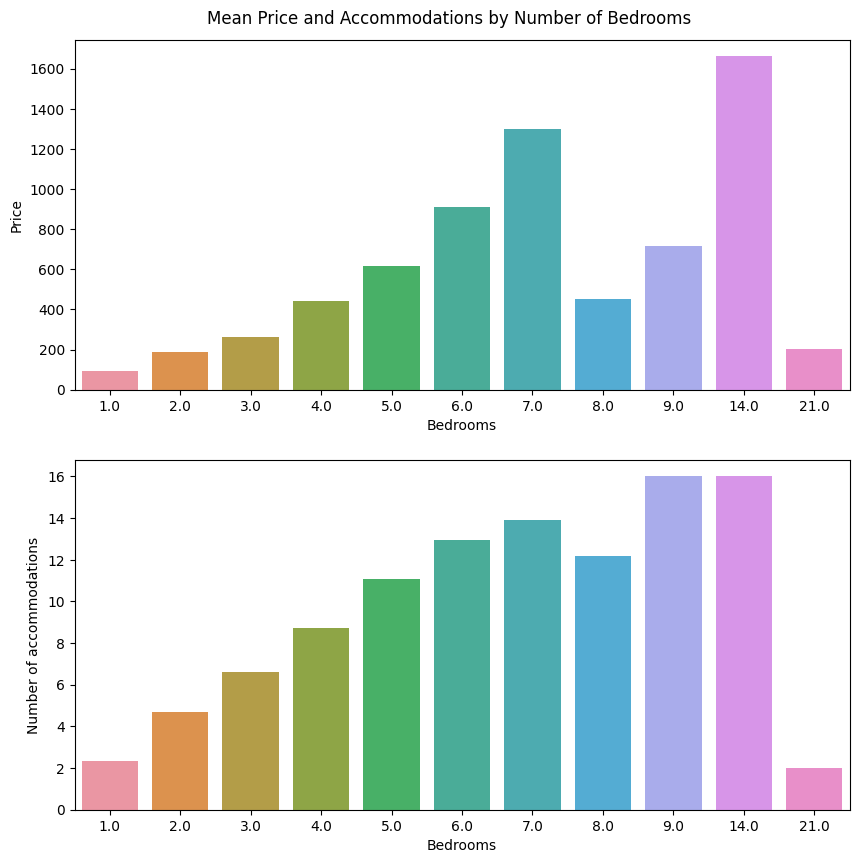

In [14]:
# Plotting mean number of accommodates and mean price by number of bedrooms

df = temp.groupby('bedrooms')[['accommodates', 'price']].agg('mean').reset_index()

fig, ax = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(df, x = 'bedrooms', y = 'price', ax = ax[0])
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Bedrooms')
sns.barplot(df, x = 'bedrooms', y = 'accommodates', ax = ax[1])
ax[1].set_ylabel('Number of accommodations')
ax[1].set_xlabel('Bedrooms')
fig.suptitle('Mean Price and Accommodations by Number of Bedrooms', y = 0.91)

plt.show();

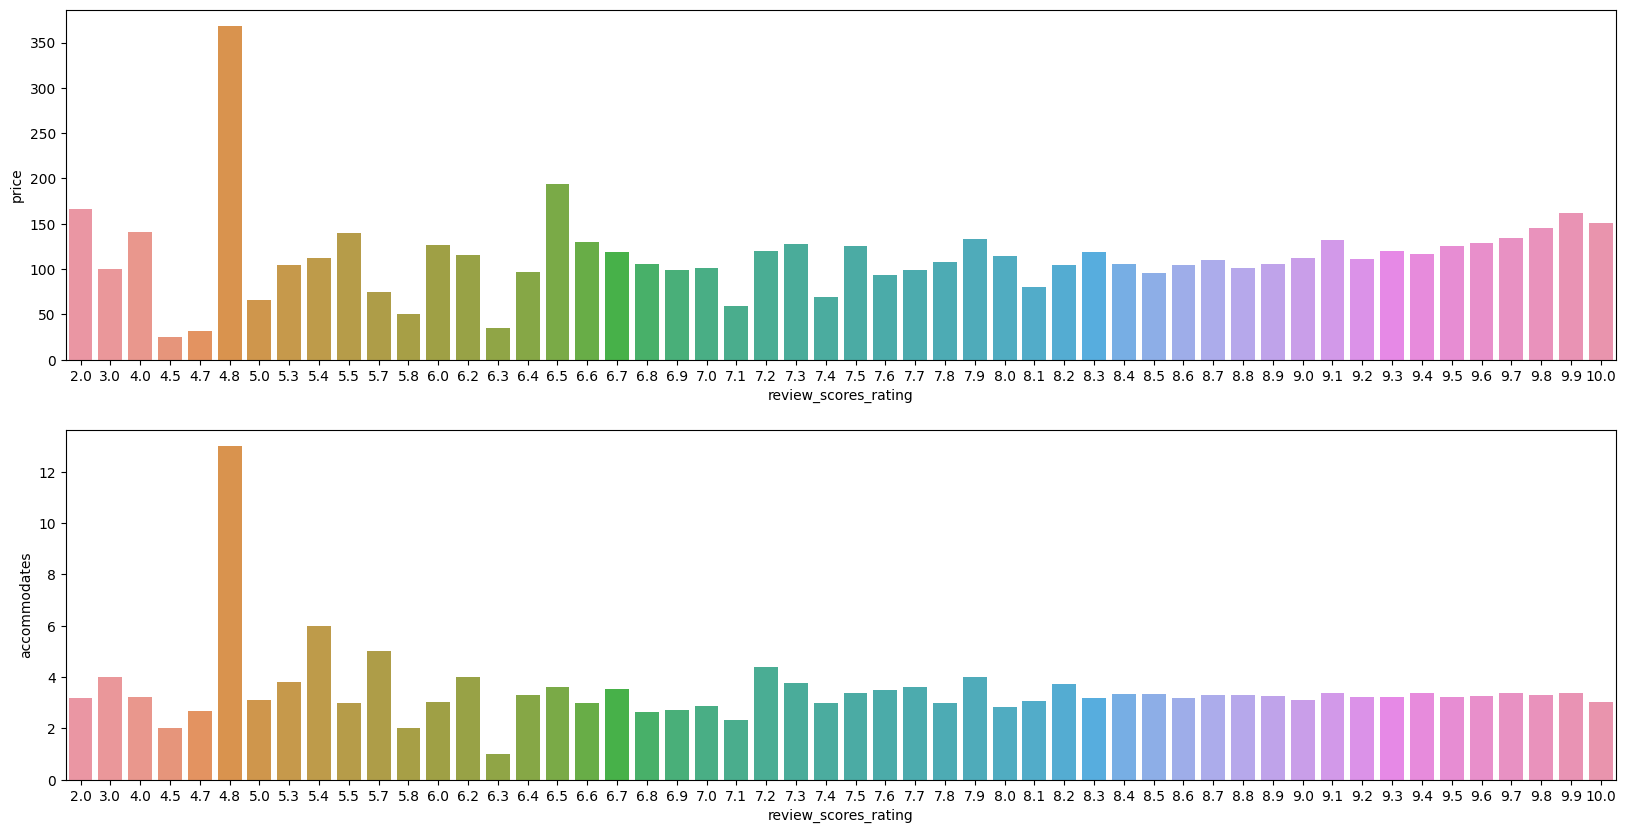

In [15]:
# Plotting mean number of accommodates and mean price by number of bedrooms

temp.review_scores_rating = temp.review_scores_rating / 10

df_review = temp.groupby('review_scores_rating')[['accommodates', 'price']].agg('mean').reset_index()

fig, ax = plt.subplots(2, 1, figsize = (20, 10))

sns.barplot(df_review, x = 'review_scores_rating', y = 'price', ax = ax[0])
sns.barplot(df_review, x = 'review_scores_rating', y = 'accommodates', ax = ax[1])

plt.show();

<Axes: xlabel='review_scores_rating', ylabel='Count'>

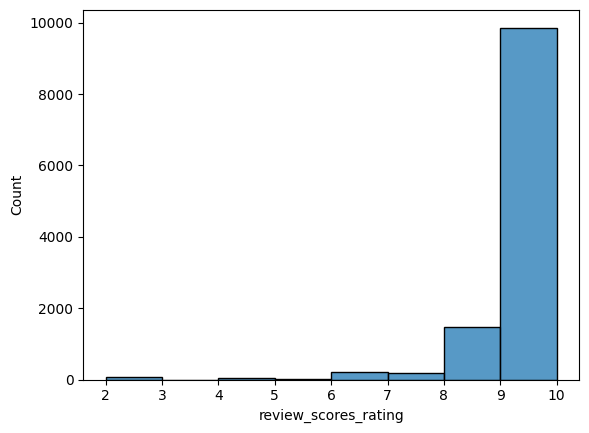

In [16]:
sns.histplot(temp['review_scores_rating'], bins = 8)

In [17]:
len(temp[temp.review_scores_rating > 90]) / len(temp) * 100

0.0

<Axes: xlabel='review_scores_value', ylabel='Count'>

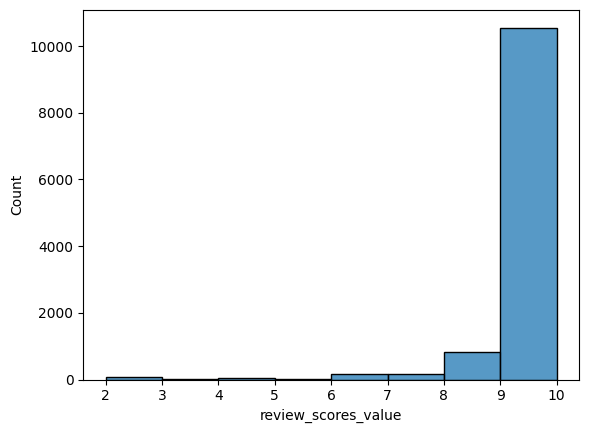

In [18]:
sns.histplot(temp['review_scores_value'], bins = 8)

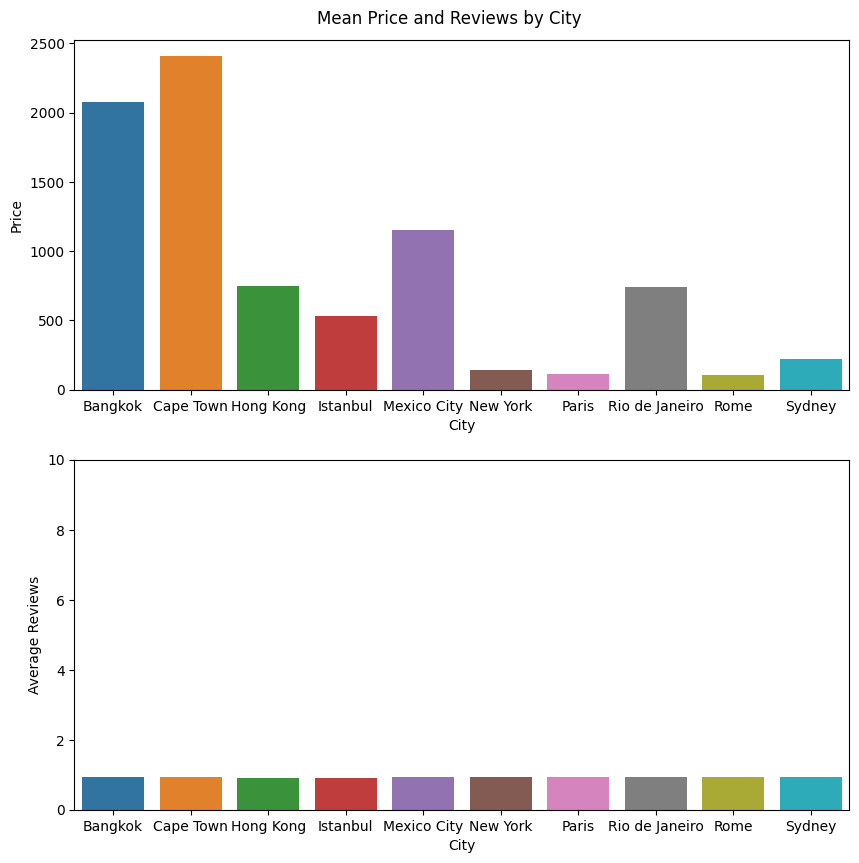

In [19]:
df_city = listings.groupby('city')[['price', 'review_scores_rating']].agg('mean').reset_index()

df_city.review_scores_rating = df_city.review_scores_rating / 10

df_city.review_scores_rating = df_city.review_scores_rating / 10



fig, ax = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(df_city, x = 'city', y = 'price', ax = ax[0])
ax[0].set_ylabel('Price')
ax[0].set_xlabel('City')
sns.barplot(df_city, x = 'city', y = 'review_scores_rating', ax = ax[1])
ax[1].set_yticks(np.arange(0, 11, step = 2))
ax[1].set_ylabel('Average Reviews')
ax[1].set_xlabel('City')
fig.suptitle('Mean Price and Reviews by City', y = 0.91)

plt.show();

In [30]:
listings.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,279712.0,2.638196e+07,1.442576e+07,2577.00000,1.384462e+07,2.767098e+07,3.978485e+07,4.834353e+07
host_id,279712.0,1.081658e+08,1.108570e+08,1822.00000,1.720656e+07,5.826911e+07,1.832853e+08,3.901874e+08
host_response_rate,150930.0,8.659386e-01,2.837443e-01,0.00000,9.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,166625.0,8.271684e-01,2.892025e-01,0.00000,7.800000e-01,9.800000e-01,1.000000e+00,1.000000e+00
host_total_listings_count,279547.0,2.458161e+01,2.840411e+02,0.00000,1.000000e+00,1.000000e+00,4.000000e+00,7.235000e+03
latitude,279712.0,1.876186e+01,3.256034e+01,-34.26440,-2.296439e+01,4.071079e+01,4.190861e+01,4.890491e+01
longitude,279712.0,1.259508e+01,7.308131e+01,-99.33963,-4.319804e+01,2.382780e+00,2.898673e+01,1.513398e+02
accommodates,279712.0,3.288736e+00,2.133379e+00,0.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,250277.0,1.515509e+00,1.153080e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01
price,279712.0,6.087927e+02,3.441827e+03,0.00000,7.500000e+01,1.500000e+02,4.740000e+02,6.252160e+05


In [21]:
temp = listings.copy()

cities = listings['city'].unique()
exchange_rates = [1.0808, 1, 0.028388, 0.20328, 0.65462, 0.039480, 1.0808, 0.12777, 0.0493, 0.053215]
currency_map = dict(zip(cities, exchange_rates))
temp['usd_price'] = temp.apply(lambda row: row['price'] * currency_map[row['city']], axis=1)

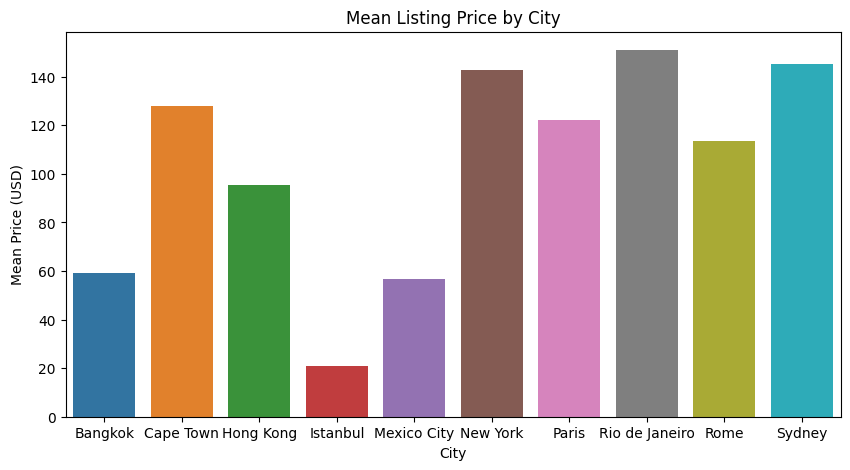

In [22]:
df_city = temp.groupby('city')[['usd_price', 'review_scores_rating']].agg('mean').reset_index()

plt.figure(figsize = (10, 5))

sns.barplot(df_city, x = 'city', y = 'usd_price')
plt.ylabel('Mean Price (USD)')
plt.xlabel('City')
plt.title('Mean Listing Price by City')

plt.show();

In [23]:
round(temp[num_cols[1:]].describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
host_total_listings_count,279547.0,24.58,284.04,0.00,1.00,1.00,4.00,7.235000e+03
latitude,279712.0,18.76,32.56,-34.26,-22.96,40.71,41.91,4.890000e+01
longitude,279712.0,12.60,73.08,-99.34,-43.20,2.38,28.99,1.513400e+02
accommodates,279712.0,3.29,2.13,0.00,2.00,2.00,4.00,1.600000e+01
bedrooms,250277.0,1.52,1.15,1.00,1.00,1.00,2.00,5.000000e+01
price,279712.0,608.79,3441.83,0.00,75.00,150.00,474.00,6.252160e+05
minimum_nights,279712.0,8.05,31.52,1.00,1.00,2.00,5.00,9.999000e+03
maximum_nights,279712.0,27558.60,7282875.16,1.00,45.00,1125.00,1125.00,2.147484e+09
review_scores_rating,188307.0,93.41,10.07,20.00,91.00,96.00,100.00,1.000000e+02
review_scores_accuracy,187999.0,9.57,0.99,2.00,9.00,10.00,10.00,1.000000e+01


In [24]:
temp.review_scores_rating = temp.review_scores_rating / 10

In [25]:
num_cols.append('usd_price')

In [26]:
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,279712.0,2.638196e+07,1.442576e+07,2577.00000,1.384462e+07,2.767098e+07,3.978485e+07,4.834353e+07
host_id,279712.0,1.081658e+08,1.108570e+08,1822.00000,1.720656e+07,5.826911e+07,1.832853e+08,3.901874e+08
host_response_rate,150930.0,8.659386e-01,2.837443e-01,0.00000,9.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,166625.0,8.271684e-01,2.892025e-01,0.00000,7.800000e-01,9.800000e-01,1.000000e+00,1.000000e+00
host_total_listings_count,279547.0,2.458161e+01,2.840411e+02,0.00000,1.000000e+00,1.000000e+00,4.000000e+00,7.235000e+03
latitude,279712.0,1.876186e+01,3.256034e+01,-34.26440,-2.296439e+01,4.071079e+01,4.190861e+01,4.890491e+01
longitude,279712.0,1.259508e+01,7.308131e+01,-99.33963,-4.319804e+01,2.382780e+00,2.898673e+01,1.513398e+02
accommodates,279712.0,3.288736e+00,2.133379e+00,0.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,250277.0,1.515509e+00,1.153080e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01
price,279712.0,6.087927e+02,3.441827e+03,0.00000,7.500000e+01,1.500000e+02,4.740000e+02,6.252160e+05
